In [104]:
#pip install torch torchvision torchaudio
import torch
import torch.nn as nn 
import torch.nn.functional as F 
from torch.optim import SGD

import matplotlib.pyplot as plt
import seaborn as sns


In [105]:
class BasicNN(nn.Module):

    def __init__(self):

        super().__init__()

        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)
        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)

        self.final_bias = nn.Parameter(torch.tensor(-16.0), requires_grad=False)


    def forward(self, input):

        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01


        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11

        input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias

        output = F.relu(input_to_final_relu)

        return output



In [106]:
input_doses = torch.linspace(start=0, end=1, steps=11)
input_doses

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])

In [107]:
model = BasicNN()

output_values = model(input_doses)
output_values

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0100, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000])

Text(0.5, 0, 'Dosage')

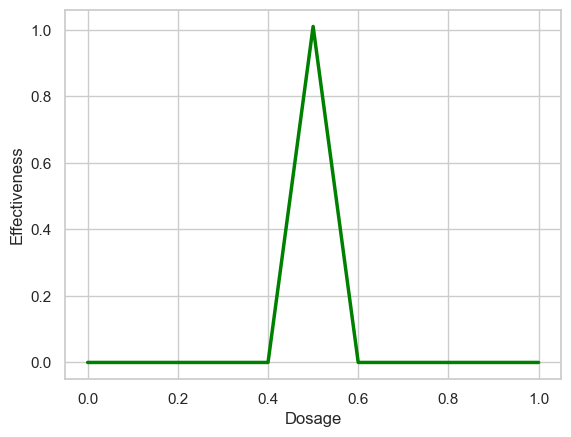

In [108]:
sns.set(style="whitegrid")
sns.lineplot(x=input_doses,
             y = output_values,
             color="green",
             linewidth=2.5)

plt.ylabel('Effectiveness')
plt.xlabel('Dosage')

In [109]:
class BasicNN_train(nn.Module):

    def __init__(self):

        super().__init__()

        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)
        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)

        self.final_bias = nn.Parameter(torch.tensor(0.0), requires_grad=True)


    def forward(self, input):

        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01


        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11

        input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias

        output = F.relu(input_to_final_relu)

        return output



Text(0.5, 0, 'Dosage')

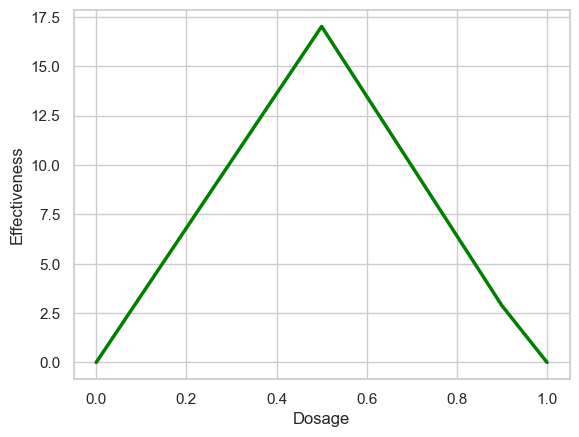

In [110]:
model = BasicNN_train()

output_values = model(input_doses)

sns.set(style="whitegrid")

sns.lineplot(x=input_doses,
             y = output_values.detach(),
             color="green",
             linewidth=2.5)

plt.ylabel('Effectiveness')
plt.xlabel('Dosage')

In [111]:
inputs = torch.tensor([0,0.5,1.])
labels = torch.tensor([0.,1.,0.])

In [112]:
#Backpropagation

optimizer = SGD(model.parameters(), lr = 0.04) 

for epoch in range(100):

    total_loss = 0

    for iteration in range(len(inputs)):
        input_i = inputs[iteration]
        label_i = labels[iteration]

        output_i = model(input_i)

        loss = (output_i - label_i)**2

        loss.backward()

        total_loss += float(loss)

    
    if (total_loss < 0.0001):
        print("Num steps: " + str(epoch))
        break

    optimizer.step()
    optimizer.zero_grad()

    print("Step: " + str(epoch) + " Final Bias: " +  str(model.final_bias.data) + "\n")




Step: 0 Final Bias: tensor(-1.2808)

Step: 1 Final Bias: tensor(-2.4591)

Step: 2 Final Bias: tensor(-3.5432)

Step: 3 Final Bias: tensor(-4.5405)

Step: 4 Final Bias: tensor(-5.4581)

Step: 5 Final Bias: tensor(-6.3023)

Step: 6 Final Bias: tensor(-7.0789)

Step: 7 Final Bias: tensor(-7.7934)

Step: 8 Final Bias: tensor(-8.4507)

Step: 9 Final Bias: tensor(-9.0554)

Step: 10 Final Bias: tensor(-9.6118)

Step: 11 Final Bias: tensor(-10.1237)

Step: 12 Final Bias: tensor(-10.5946)

Step: 13 Final Bias: tensor(-11.0278)

Step: 14 Final Bias: tensor(-11.4264)

Step: 15 Final Bias: tensor(-11.7931)

Step: 16 Final Bias: tensor(-12.1304)

Step: 17 Final Bias: tensor(-12.4408)

Step: 18 Final Bias: tensor(-12.7263)

Step: 19 Final Bias: tensor(-12.9890)

Step: 20 Final Bias: tensor(-13.2307)

Step: 21 Final Bias: tensor(-13.4530)

Step: 22 Final Bias: tensor(-13.6576)

Step: 23 Final Bias: tensor(-13.8458)

Step: 24 Final Bias: tensor(-14.0189)

Step: 25 Final Bias: tensor(-14.1782)

Step: 2

Text(0.5, 0, 'Dosage')

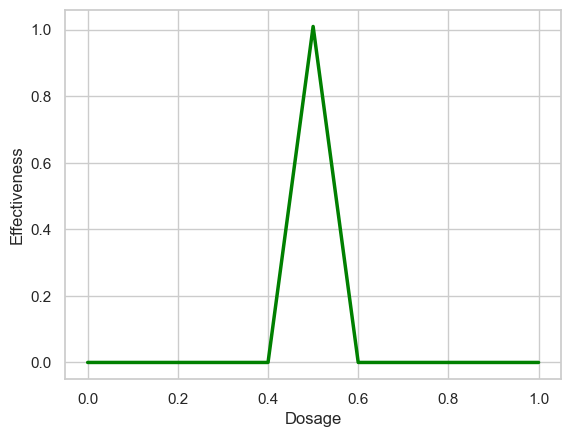

In [113]:
output_values = model(input_doses)

sns.set(style="whitegrid")

sns.lineplot(x=input_doses,
             y = output_values.detach(),
             color="green",
             linewidth=2.5)

plt.ylabel('Effectiveness')
plt.xlabel('Dosage')